# <h1> HR 데이터 분석 (Human Resources Data) </h1>
- 조직의 인적자원(직원)과 관련된 데이터
- 조직의 인적 자원을 효과적으로 관리하고 경쟁력을 유지

##### hr데이터 정보
- EID : 직원ID(사번)
- ENAME : 직원 이름
- GENDER : 성별(남/여)
- NATION : 국적
- ORG_CD : 부서 코드
- POS_CD : 직급 코드
- AGE : 나이
- SERVICE_YEAR : 근속 연수 (몇년 근무했는지)
- EDU_LEVEL : 학력 수준 (고졸, 대졸 등)
- PERFORMANCE_SCORE : 성과 점수
- SALARY : 급여 (연봉)
- LAST_PROMO_DT : 마지막 승진 날짜
- TRAINING_HOURS : 교육 이수 시간 (사내 교육)
- SKILLS : 보유 기술 (예: Python, Excel)
- ACTIVE_STATE : 현재 근무 상태 (재직/퇴사)
- HIRE_DATE : 입사일
- RETIRE_DATE : 퇴사일
- RETIRE_REASON : 퇴사 사유
- REHIRE_YN : 재입사 여부 (Y/N)
- ROUNDING_DEDUCTION : 급여에서 공제된 금액

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 인코딩 찾기
import chardet # 텍스트 파일의 문자 인코딩을 자동으로 감지하는 라이브러리

#가져올 데이터 확인
with open('./data/hr-info.csv','rb') as f:
    d = f.read()
# detect() 문자 인코딩을 자동으로 감지하는 함수
chardet.detect(d)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [71]:
# 1. 데이터 불러오기
data= pd.read_csv('./data/hr-info.csv', encoding='EUC-KR')
data.index = range(1, len(data) + 1)
data.index.name = "ROW_NUM"
data

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
ROW_NUM,,,,,,,,,,,,,,,,,,,,
1,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
2,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
3,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
4,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
5,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [82]:
# 직원의 id 이름 급여 정보 추출
data.loc[:, ['EID', 'ENAME', 'SALARY', 'NATION']]

,EID,ENAME,SALARY,NATION
ROW_NUM,,,,
1,E00206,시이오,10200,KOREA
2,E00181,나사장,9500,KOREA
3,E00164,난부사장,9100,KOREA
4,E00190,판라다,8500,KOREA
5,E00209,누훈봉,8600,KOREA
...,...,...,...,...
196,E00322,부탐회,4500,KOREA
197,E00389,초두반,4500,KOREA
198,E00438,권개득,4500,KOREA


In [50]:
# 급여의 총 합계
print(data['SALARY'].sum())
# 전체 직원의 평균 급여
print(data['SALARY'].mean())

1197400
5987.0


In [73]:
# 직원의 남녀 비율
print(len(data[data['GENDER']=='M'])/len(data))
print(len(data[data['GENDER']=='F'])/len(data))

data['GENDER'].value_counts()/len(data)

0.585
0.415


GENDER
M    0.585
F    0.415
Name: count, dtype: float64

In [81]:
# 퇴사한 직원 수
print(len(data[data['RETIRE_DATE'].notnull()]))
print(len(data[data['ACTIVE_STATE']=='N']))

49
49


In [90]:
# 직원의 국적
data['NATION'].unique()
# data[data['NATION'] != 'KOREA']

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

In [23]:
# 최대 근속 연수
data['SERVICE_YEAR'].max()

25

<Axes: xlabel='AGE', ylabel='SALARY'>

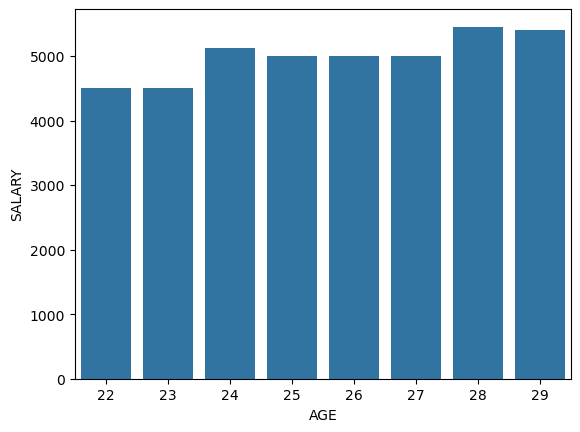

In [64]:
# 20~29, 30~39, 40~49 groupby
sns.barplot(data = data[(data['AGE'] >= 20) & (data['AGE'] <= 29)][['AGE', 'SALARY']].groupby(by='AGE').mean().astype('int16'),
            x='AGE',y='SALARY')

In [69]:
# 데이터 분석
# 아이디, 이름, 성별, 교육수준, 급여 컬럼만 추출해서 my_data에 저장
my_data = data.loc[:,['EID', 'ENAME', 'GENDER', 'EDU_LEVEL', 'SALARY']]

,EID,ENAME,GENDER,EDU_LEVEL,SALARY
1,E00206,시이오,M,박사 학위,10200
2,E00181,나사장,F,박사 학위,9500
3,E00164,난부사장,M,박사 학위,9100
4,E00190,판라다,F,박사 학위,8500
5,E00209,누훈봉,M,박사 학위,8600
...,...,...,...,...,...
196,E00322,부탐회,F,학사 학위,4500
197,E00389,초두반,F,학사 학위,4500
198,E00438,권개득,M,학사 학위,4500
199,E00304,탐출조,M,학사 학위,4500


<Axes: xlabel='EDU_LEVEL', ylabel='SALARY'>

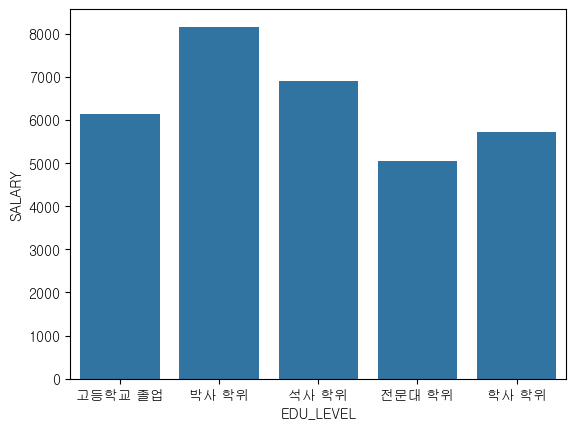

In [106]:
# data['EDU_LEVEL'].unique()
# 교육 수준별 데이터 확인
# 교육 수준별 평균 급여를 데이터로 확인
# data_lv = data[data.loc['EDU_LEVEL', 'SALARY']]#.groupby(by='SALARY').mean().astype('int16')
data_lv = data.loc[:,['EDU_LEVEL', 'SALARY']].groupby(by='EDU_LEVEL').mean().astype('int16')
data_lv
# 시각화

# 한글불러오기
plt.rcParams['font.family']='Gulim'


sns.barplot(data=data_lv, x='EDU_LEVEL', y='SALARY')

In [169]:
# 교육 수준과 성별에 따른 급여의 평균, 최대, 최소, 중앙값 확인
data_salary = pd.DataFrame()
data_salary['mean'] = data.loc[:,['EDU_LEVEL', 'SALARY', 'GENDER']].groupby(by=['EDU_LEVEL','GENDER']).mean().astype('int16')
data_salary['max'] = data.loc[:,['EDU_LEVEL', 'SALARY', 'GENDER']].groupby(by=['EDU_LEVEL','GENDER']).max().astype('int16')
data_salary['min'] = data.loc[:,['EDU_LEVEL', 'SALARY', 'GENDER']].groupby(by=['EDU_LEVEL','GENDER']).min().astype('int16')
data_salary['median'] = data.loc[:,['EDU_LEVEL', 'SALARY', 'GENDER']].groupby(by=['EDU_LEVEL','GENDER']).median().astype('int16')

edu_data_salary = data.groupby(by=['EDU_LEVEL','GENDER'])['SALARY'].agg(['mean', 'max', 'min', 'median']).astype('int16')

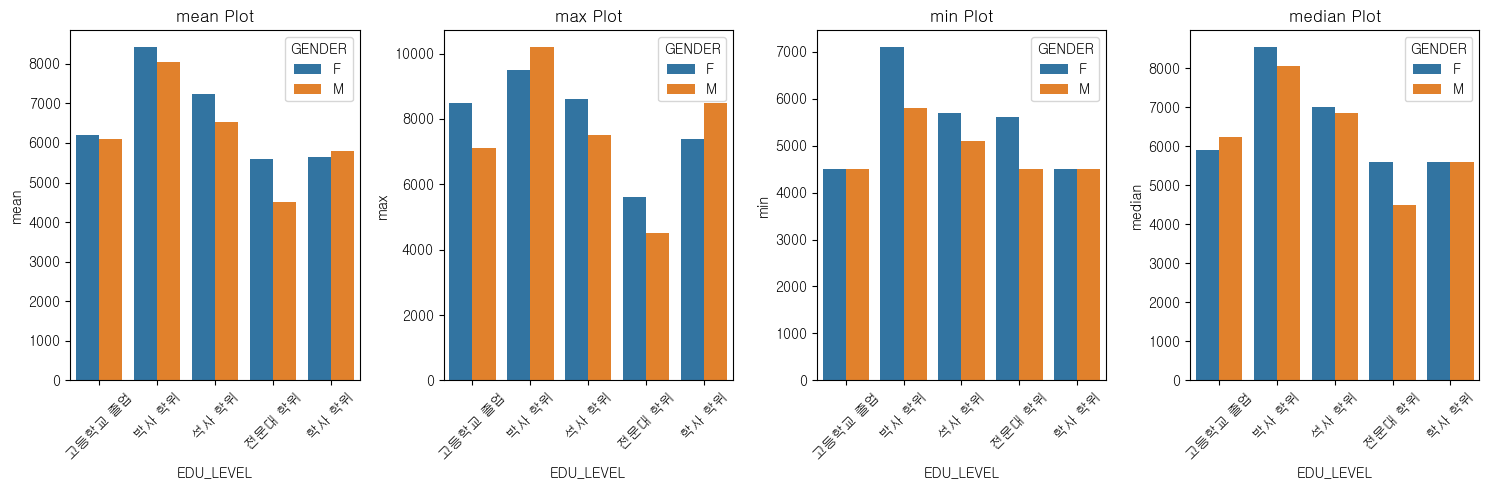

In [166]:
# 시각화
# 한글불러오기
plt.rcParams['font.family']='Gulim'

# Figure 생성
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)  # (2행, 2열, 첫 번째 위치)
sns.barplot(x='EDU_LEVEL', y='mean', hue='GENDER', data=edu_data_salary)
plt.xticks(rotation=45)
plt.title("mean Plot")

plt.subplot(1, 4, 2)  # (2행, 2열, 두 번째 위치)
sns.barplot(x='EDU_LEVEL', y='max', hue='GENDER', data=edu_data_salary)
plt.xticks(rotation=45)
plt.title("max Plot")

plt.subplot(1, 4, 3)  # (2행, 2열, 세 번째 위치)
sns.barplot(x='EDU_LEVEL', y='min', hue='GENDER', data=edu_data_salary)
plt.xticks(rotation=45)
plt.title("min Plot")

plt.subplot(1, 4, 4)  # (2행, 2열, 네 번째 위치)
sns.barplot(x='EDU_LEVEL', y='median', hue='GENDER', data=edu_data_salary)
plt.xticks(rotation=45)
plt.title("median Plot")

# 그래프 레이아웃 조정
plt.tight_layout()  # 그래프 간 간격 조정
plt.show()